# Pixelwise Visible Ground Plane and Complete Ground Plane

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load VE Behavioral Data

In [187]:

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'


# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# std 
with open(dpath + 'z_std_125.npy' , 'rb') as f:
    std_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_std_250.npy' , 'rb') as f:
    std_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_std_1000.npy' , 'rb') as f:
    std_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'X_125.npy' , 'rb') as f:
    X_125 = np.load(f, allow_pickle=True)
with open(dpath + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)
with open(dpath + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'z_final_y_125.npy' , 'rb') as f:
    y_125 = np.load(f, allow_pickle=True)
with open(dpath + 'z_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'z_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)
    
# residuals
# with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
#     residuals_125 = np.load(f, allow_pickle=True)
# with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
#     residuals_250 = np.load(f, allow_pickle=True) 
# with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
#     residuals_1000= np.load(f, allow_pickle=True)
    
# residuals: actual depth z-scored as well
with open(dpath + 'residuals/'+ 'acZS_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'acZS_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'acZS_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)

## Load Discrimination Derived TD (target depth) data

In [188]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/data/finalDiscrimMatched/kinectCoded_discrimination/discrimination_derived_TD/'


with open(dpath + 'stim.npy' , 'rb') as f:
    derivedTD_stim = np.load(f, allow_pickle=True)
derivedTD_stim = [elem.split('/')[1][:-2] for elem in derivedTD_stim]

    
with open(dpath + 'derivedTD_125.npy' , 'rb') as f:
    _derivedTD_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedTD_250.npy' , 'rb') as f:
    _derivedTD_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedTD_1000.npy' , 'rb') as f:
    _derivedTD_1000 = np.load(f, allow_pickle=True) 
    
with open(dpath + 'residuals_derivedTD_125.npy' , 'rb') as f:
    _residuals_derivedTD_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedTD_250.npy' , 'rb') as f:
    _residuals_derivedTD_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedTD_1000.npy' , 'rb') as f:
    _residuals_derivedTD_1000 = np.load(f, allow_pickle=True) 
    

## Load Discrimination Derived VE  Data

In [189]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/data/finalDiscrimMatched/discrimination_derived_VE/'

with open(dpath + 'stimuli_125.npy' , 'rb') as f:
    derivedVE_stim_125 = np.load(f, allow_pickle=True)
derivedVE_stim_125 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_125]

with open(dpath + 'stimuli_250.npy' , 'rb') as f:
    derivedVE_stim_250 = np.load(f, allow_pickle=True)
derivedVE_stim_250 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_250]

with open(dpath + 'stimuli_1000.npy' , 'rb') as f:
    derivedVE_stim_1000 = np.load(f, allow_pickle=True)
derivedVE_stim_1000 = [elem.split('/')[1][:-2] for elem in derivedVE_stim_1000]

    
with open(dpath + 'derivedVE_125.npy' , 'rb') as f:
    _derivedVE_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedVE_250.npy' , 'rb') as f:
    _derivedVE_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'derivedVE_1000.npy' , 'rb') as f:
    _derivedVE_1000 = np.load(f, allow_pickle=True) 
    
with open(dpath + 'residuals_derivedVE_125.npy' , 'rb') as f:
    _residuals_derivedVE_125 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedVE_250.npy' , 'rb') as f:
    _residuals_derivedVE_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals_derivedVE_1000.npy' , 'rb') as f:
    _residuals_derivedVE_1000 = np.load(f, allow_pickle=True) 
    

## Data arrays must be in the same stimulus order as the VE behavioral data

In [190]:
derivedVE_dict_125 = {}
derivedVE_dict_250 = {}
derivedVE_dict_1000 = {}

for i in range(len(derivedVE_stim_125)):
    derivedVE_dict_125[derivedVE_stim_125[i]] = [_derivedVE_125[i], _residuals_derivedVE_125[i]]
    
for i in range(len(derivedVE_stim_250)):
    derivedVE_dict_250[derivedVE_stim_250[i]] = [_derivedVE_250[i], _residuals_derivedVE_250[i]]
    
for i in range(len(derivedVE_stim_1000)):
    derivedVE_dict_1000[derivedVE_stim_1000[i]] = [_derivedVE_1000[i], _residuals_derivedVE_1000[i]]

In [191]:
stimfolder_125 = [elem.split('/')[1][:-2] for elem in stim_125]
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]
stimfolder_250[0]

'002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize'

In [192]:
stimfolder_125 = [elem.split('/')[1][:-2] for elem in stim_125]
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]
stimfolder_250[0]

'002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize'

In [193]:
derivedTD_dict_125 = {}
derivedTD_dict_250 = {}
derivedTD_dict_1000 = {}

for i in range(len(derivedTD_stim)):
    derivedTD_dict_125[derivedTD_stim[i]] = [_derivedTD_125[i], _residuals_derivedTD_125[i]]
    
for i in range(len(derivedTD_stim)):
    derivedTD_dict_250[derivedTD_stim[i]] = [_derivedTD_250[i], _residuals_derivedTD_250[i]]
    
for i in range(len(derivedTD_stim)):
    derivedTD_dict_1000[derivedTD_stim[i]] = [_derivedTD_1000[i], _residuals_derivedTD_1000[i]]

## Load Ground Plane Metrics: Pixel Sum

In [194]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/gp_metrics.json'
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/gp_metrics.json'
gp_metrics = json.load(open(path))
# [percent_VGP_GP, percent_VGP_image, percent_GP_image]

In [195]:
ordered_gp_metrics = []
ordered_gp_metrics_folders = []
c_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_metrics.append(gp_metrics[folder])
        ordered_gp_metrics_folders.append(folder)
    except:
        c_none += 1
        ordered_gp_metrics.append(None)
        ordered_gp_metrics_folders.append(None)

In [196]:
len(ordered_gp_metrics), c_none

(156, 0)

In [197]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" + targetobj_num
#     p = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli/' + folder + '_' + targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

156

In [198]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []
trunc_vgp_gp = []
trunc_vgp = [] 
trunc_gp = []
trunc_actual = []
trunc_std_125 = []
trunc_std_250 = []
trunc_std_1000 = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_vgp_gp.append(metrics[0])
        trunc_vgp.append(metrics[1])
        trunc_gp.append(metrics[2])
        
        trunc_resid_125.append(residuals_125[i])
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
        
        trunc_std_125.append(std_125[i])
        trunc_std_250.append(std_250[i])
        trunc_std_1000.append(std_1000[i])
         


In [199]:
len(trunc_vgp_gp), len(trunc_resid_250), len(ordered_gp_metrics)

(156, 156, 156)

In [200]:
# print(stats.pearsonr(trunc_resid_125, trunc_pitches))
# print(stats.pearsonr(trunc_resid_250, trunc_pitches))
# print(stats.pearsonr(trunc_resid_1000, trunc_pitches))

In [201]:
# plt.hist(trunc_vgp_gp)

In [202]:
# discrimination derived verbal estimates variables
dd_vgp_gp = []
dd_vgp = []
dd_gp = []

dd_residuals_125 = []
dd_residuals_250 = []
dd_residuals_1000 = []

dd_125 = []
dd_250 = []
dd_1000 = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        try:
            stim_dd_125, stim_dd_resid_125 = derivedVE_dict_125[ordered_gp_metrics_folders[i]]
            stim_dd_250, stim_dd_resid_250 = derivedVE_dict_250[ordered_gp_metrics_folders[i]]
            stim_dd_1000, stim_dd_resid_1000 = derivedVE_dict_1000[ordered_gp_metrics_folders[i]]
            
            dd_125.append(stim_dd_125)
            dd_residuals_125.append(stim_dd_resid_125)

            dd_250.append(stim_dd_250)
            dd_residuals_250.append(stim_dd_resid_250)

            dd_1000.append(stim_dd_1000)
            dd_residuals_1000.append(stim_dd_resid_1000)

            dd_vgp_gp.append(metrics[0])
            dd_vgp.append(metrics[1])
            dd_gp.append(metrics[2])
        

        except:
            pass


In [203]:
len(dd_1000), len(dd_vgp)

(152, 152)

In [204]:
# discrimination derived target depth variables

ddTD_vgp_gp = []
ddTD_vgp = []
ddTD_gp = []

ddTD_residuals_125 = []
ddTD_residuals_250 = []
ddTD_residuals_1000 = []

ddTD_125 = []
ddTD_250 = []
ddTD_1000 = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        stim_ddTD_125, stim_residTD_125 = derivedTD_dict_125[ordered_gp_metrics_folders[i]]
        ddTD_125.append(stim_ddTD_125)
        ddTD_residuals_125.append(stim_residTD_125)

        stim_ddTD_250, stim_residTD_250 = derivedTD_dict_250[ordered_gp_metrics_folders[i]]
        ddTD_250.append(stim_ddTD_250)
        ddTD_residuals_250.append(stim_residTD_250)

        stim_ddTD_1000, stim_residTD_1000 = derivedTD_dict_1000[ordered_gp_metrics_folders[i]]
        ddTD_1000.append(stim_ddTD_1000)
        ddTD_residuals_1000.append(stim_residTD_1000)

        ddTD_vgp_gp.append(metrics[0])
        ddTD_vgp.append(metrics[1])
        ddTD_gp.append(metrics[2])
            
#         try:
#             stim_ddTD_125, stim_residTD_125 = derivedTD_dict_125[ordered_gp_metrics_folders[i]]
#             ddTD_125.append(stim_ddTD_125)
#             ddTD_residuals_125.append(stim_residTD_125)

#             stim_ddTD_250, stim_residTD_250 = derivedTD_dict_250[ordered_gp_metrics_folders[i]]
#             ddTD_250.append(stim_ddTD_250)
#             ddTD_residuals_250.append(stim_residTD_250)

#             stim_ddTD_1000, stim_residTD_1000 = derivedTD_dict_1000[ordered_gp_metrics_folders[i]]
#             ddTD_1000.append(stim_ddTD_1000)
#             ddTD_residuals_1000.append(stim_residTD_1000)

#             ddTD_vgp_gp.append(metrics[0])
#             ddTD_vgp.append(metrics[1])
#             ddTD_gp.append(metrics[2])

#         except:
#             pass


In [205]:
len(ddTD_125), len(ddTD_vgp)

(156, 156)

In [206]:
print("Correlation between Discrimination Derived Verbal Estimates and VGP/GP")
print('125 ms: ',stats.pearsonr(dd_125, dd_vgp_gp))
print('250 ms: ',stats.pearsonr(dd_250, dd_vgp_gp))
print('1000 ms: ',stats.pearsonr(dd_1000, dd_vgp_gp))


Correlation between Discrimination Derived Verbal Estimates and VGP/GP
125 ms:  (-0.09905440173336111, 0.22469736262734133)
250 ms:  (0.056920850423439986, 0.48609113976829077)
1000 ms:  (-0.017004321817383445, 0.835285348641447)


In [207]:
print("Correlation between Discrimination Derived Verbal Estimates and VGP")
print('125 ms: ',stats.pearsonr(dd_125, dd_vgp))
print('250 ms: ',stats.pearsonr(dd_250, dd_vgp))
print('1000 ms: ',stats.pearsonr(dd_1000, dd_vgp))


Correlation between Discrimination Derived Verbal Estimates and VGP
125 ms:  (0.02099270851468486, 0.7974047582961941)
250 ms:  (0.12096374903757132, 0.1376797800662004)
1000 ms:  (0.013949430923838425, 0.8645628793621422)


In [208]:
print("Correlation between Discrimination Derived Verbal Estimates and GP")
print('125 ms: ',stats.pearsonr(dd_125, dd_gp))
print('250 ms: ',stats.pearsonr(dd_250, dd_gp))
print('1000 ms: ',stats.pearsonr(dd_1000, dd_gp))

Correlation between Discrimination Derived Verbal Estimates and GP
125 ms:  (0.07667157040598359, 0.3478076105617776)
250 ms:  (0.019349135147536334, 0.8129631865599586)
1000 ms:  (0.008797962175322804, 0.9143326412418443)


In [209]:
print("Correlation between Discrimination Derived Verbal Estimates Linear Model Residuals and VGP/GP")
print('125 ms: ',stats.pearsonr(dd_residuals_125, dd_vgp_gp))
print('250 ms: ',stats.pearsonr(dd_residuals_250, dd_vgp_gp))
print('1000 ms: ',stats.pearsonr(dd_residuals_1000, dd_vgp_gp))


Correlation between Discrimination Derived Verbal Estimates Linear Model Residuals and VGP/GP
125 ms:  (-0.04910762717814735, 0.5479703676007115)
250 ms:  (0.14155335776627112, 0.0819379190804502)
1000 ms:  (0.06875601582162488, 0.3999670130938618)


In [210]:
"Correlation between Discrimination Derived Verbal Estimates Linear Model Residuals and VGP"
print('125 ms: ',stats.pearsonr(dd_residuals_125, dd_vgp))
print('250 ms: ',stats.pearsonr(dd_residuals_250, dd_vgp))
print('1000 ms: ',stats.pearsonr(dd_residuals_1000, dd_vgp))


125 ms:  (-0.015529877085814414, 0.8493905532743488)
250 ms:  (0.10297748347717708, 0.20677957097851332)
1000 ms:  (-0.03671863691738539, 0.6533506767348262)


In [211]:
"Correlation between Discrimination Derived Verbal Estimates Linear Model Residuals and GP"
print('125 ms: ',stats.pearsonr(dd_residuals_125, dd_gp))
print('250 ms: ',stats.pearsonr(dd_residuals_250, dd_gp))
print('1000 ms: ',stats.pearsonr(dd_residuals_1000, dd_gp))


125 ms:  (-0.061157186059493315, 0.4541747852693216)
250 ms:  (-0.14117047644265324, 0.0827766210293775)
1000 ms:  (-0.1946246117341116, 0.01627418427342178)


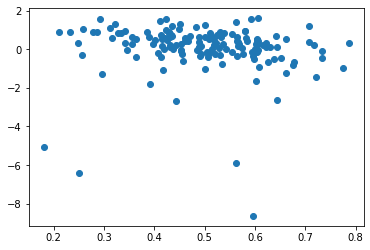

In [212]:
plt.plot(dd_gp, dd_residuals_125, 'o')
plt.show();

In [213]:
print("Correlation between Average Discrimination Derived Verbal Estimates Linear Model Residuals and GP")

print('GP: ',stats.pearsonr(np.mean([dd_residuals_125, dd_residuals_250, dd_residuals_1000], axis=0), dd_gp))
print('VGP: ',stats.pearsonr(np.mean([dd_residuals_125, dd_residuals_250, dd_residuals_1000], axis=0), dd_vgp))
print('VGP/GP: ',stats.pearsonr(np.mean([dd_residuals_125, dd_residuals_250, dd_residuals_1000], axis=0), dd_vgp_gp))



Correlation between Average Discrimination Derived Verbal Estimates Linear Model Residuals and GP
GP:  (-0.16661384113109734, 0.040212514009119564)
VGP:  (0.022998153706148113, 0.778528728185084)
VGP/GP:  (0.05695854087890541, 0.4858019858252776)


In [214]:
print("Correlation between All Discrimination Derived Verbal Estimates Linear Model Residuals and GP")

print('GP ',stats.pearsonr(dd_residuals_125+dd_residuals_250+dd_residuals_1000, dd_gp*3))
print('VGP ',stats.pearsonr(dd_residuals_125+dd_residuals_250+dd_residuals_1000, dd_vgp*3))
print('VGP/GP ',stats.pearsonr(dd_residuals_125+dd_residuals_250+dd_residuals_1000, dd_vgp_gp*3))



Correlation between All Discrimination Derived Verbal Estimates Linear Model Residuals and GP
GP  (-0.1175453359265432, 0.01200811999900642)
VGP  (0.016225096815050244, 0.7296846547731117)
VGP/GP  (0.04018400137734452, 0.39195017607697025)


In [215]:
print('Correlation between Abs All Discrimination Derived Verbal Estimates Linear Model Residuals and GP*3 Metrics')

print('GP ',stats.pearsonr(np.abs(np.array(dd_residuals_125+dd_residuals_250+dd_residuals_1000)), dd_gp*3))
print('VGP ',stats.pearsonr(np.abs(np.array(dd_residuals_125+dd_residuals_250+dd_residuals_1000)), dd_vgp*3))
print('VGP/GP ',stats.pearsonr(np.abs(np.array(dd_residuals_125+dd_residuals_250+dd_residuals_1000)), dd_vgp_gp*3))


Correlation between Abs All Discrimination Derived Verbal Estimates Linear Model Residuals and GP*3 Metrics
GP  (-0.09324046466832961, 0.04659716575836634)
VGP  (-0.011430831600634826, 0.8076693990285713)
VGP/GP  (0.09233232137974401, 0.04878359543444316)


In [216]:
print('Correlation between Avg Abs Discrimination Derived Verbal Estimates Linear Model Residuals and GP Metrics')

print('GP ',stats.pearsonr(np.mean([np.abs(np.array(dd_residuals_125)), np.abs(np.array(dd_residuals_250)), np.abs(np.array(dd_residuals_1000))], axis=0), dd_gp))
print('VGP ',stats.pearsonr(np.mean([np.abs(np.array(dd_residuals_125)), np.abs(np.array(dd_residuals_250)), np.abs(np.array(dd_residuals_1000))], axis=0), dd_vgp))
print('VGP/GP ',stats.pearsonr(np.mean([np.abs(np.array(dd_residuals_125)), np.abs(np.array(dd_residuals_250)), np.abs(np.array(dd_residuals_1000))], axis=0), dd_vgp_gp))

# MORE VISIBLE GP, CLOSER TO LINEAR MODEDL

Correlation between Avg Abs Discrimination Derived Verbal Estimates Linear Model Residuals and GP Metrics
GP  (-0.12484016542917674, 0.125416645655988)
VGP  (-0.01530480262075554, 0.8515480397786865)
VGP/GP  (0.12362424743923851, 0.12916897357582477)


## Discrimination Derived Target Depths

In [217]:
print("Correlation between Discrimination Derived Target Depths and VGP/GP")
print('125 ms: ',stats.pearsonr(ddTD_125, ddTD_vgp_gp))
print('250 ms: ',stats.pearsonr(ddTD_250, ddTD_vgp_gp))
print('1000 ms: ',stats.pearsonr(ddTD_1000, ddTD_vgp_gp))


Correlation between Discrimination Derived Target Depths and VGP/GP
125 ms:  (0.007228561122906693, 0.92863707012222)
250 ms:  (0.01150186836012744, 0.8866790558100873)
1000 ms:  (0.009986639594745939, 0.90152667978339)


In [218]:
print("Correlation between Discrimination Derived Target Depths and VGP")
print('125 ms: ',stats.pearsonr(ddTD_125, ddTD_vgp))
print('250 ms: ',stats.pearsonr(ddTD_250, ddTD_vgp))
print('1000 ms: ',stats.pearsonr(ddTD_1000, ddTD_vgp))


Correlation between Discrimination Derived Target Depths and VGP
125 ms:  (0.07986505515082296, 0.32164854677843585)
250 ms:  (0.08616514794141147, 0.2848275349647912)
1000 ms:  (0.08537649690589529, 0.2892755582699377)


In [219]:
print("Correlation between Discrimination Derived Target Depths and GP")
print('125 ms: ',stats.pearsonr(ddTD_125, ddTD_gp))
print('250 ms: ',stats.pearsonr(ddTD_250, ddTD_gp))
print('1000 ms: ',stats.pearsonr(ddTD_1000, ddTD_gp))

Correlation between Discrimination Derived Target Depths and GP
125 ms:  (0.12299635455305458, 0.1260952125661137)
250 ms:  (0.12613744209109615, 0.1166341307553005)
1000 ms:  (0.12547347996191388, 0.11858653572164973)


In [220]:
print("Correlation between Discrimination Derived Target Depths Linear Model Residuals and VGP/GP")
print('125 ms: ',stats.pearsonr(ddTD_residuals_125, ddTD_vgp_gp))
print('250 ms: ',stats.pearsonr(ddTD_residuals_250, ddTD_vgp_gp))
print('1000 ms: ',stats.pearsonr(ddTD_residuals_1000, ddTD_vgp_gp))


Correlation between Discrimination Derived Target Depths Linear Model Residuals and VGP/GP
125 ms:  (0.0721254261529207, 0.3709115227933711)
250 ms:  (0.02966487724942421, 0.7131601354080673)
1000 ms:  (0.02896893440096861, 0.7196046062708478)


In [221]:
"Correlation between Discrimination Derived Target Depths Linear Model Residuals and VGP"
print('125 ms: ',stats.pearsonr(ddTD_residuals_125, ddTD_vgp))
print('250 ms: ',stats.pearsonr(ddTD_residuals_250, ddTD_vgp))
print('1000 ms: ',stats.pearsonr(ddTD_residuals_1000, ddTD_vgp))


125 ms:  (0.06417748442814057, 0.4260606237554256)
250 ms:  (0.08569470213308045, 0.28747532347700505)
1000 ms:  (0.08456856079134173, 0.29388014947427404)


In [222]:
"Correlation between Discrimination Derived Target Depths Linear Model Residuals and GP"
print('125 ms: ',stats.pearsonr(ddTD_residuals_125, ddTD_gp))
print('250 ms: ',stats.pearsonr(ddTD_residuals_250, ddTD_gp))
print('1000 ms: ',stats.pearsonr(ddTD_residuals_1000, ddTD_gp))


125 ms:  (0.030495422703114755, 0.7054957212197278)
250 ms:  (0.10637119475481355, 0.1862868412996942)
1000 ms:  (0.10420484379249902, 0.1954658436907015)


### VE Data

In [223]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp_gp))

Correlation between Linear Model Residuals and VGP/GP
125 ms:  (-0.018851492305610396, 0.8153093712821365)
250 ms:  (-0.038339656844450135, 0.6346546337852923)
1000 ms:  (-0.04314995515651741, 0.5927483793610012)


In [224]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp))

Correlation between Linear Model Residuals and VGP
125 ms:  (-0.142439158117886, 0.07609421706556703)
250 ms:  (-0.1551506724547551, 0.05311634501857526)
1000 ms:  (-0.17102130143985556, 0.03279137526879198)


In [225]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gp))

Correlation between Linear Model Residuals and GP
125 ms:  (-0.28162815760000104, 0.0003685840930619894)
250 ms:  (-0.25191444997177914, 0.0015116950605810213)
1000 ms:  (-0.2705733352106526, 0.0006349445431813247)


In [226]:
print('Correlation between All Linear Model Residuals and GP*3')

print('GP ',stats.pearsonr(trunc_resid_125+trunc_resid_250+trunc_resid_1000, trunc_gp*3))
print('VGP ',stats.pearsonr(trunc_resid_125+trunc_resid_250+trunc_resid_1000, trunc_vgp*3))
print('VGP/GP ',stats.pearsonr(trunc_resid_125+trunc_resid_250+trunc_resid_1000, trunc_vgp_gp*3))




Correlation between All Linear Model Residuals and GP*3
GP  (-0.26825190582210934, 3.7228050410300447e-09)
VGP  (-0.15602754745785227, 0.0007062740220375175)
VGP/GP  (-0.033241928257037257, 0.4731223706240619)


In [227]:
print('Correlation between All Linear Model Residuals and GP*3')

print('GP ',stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), trunc_gp))
print('VGP ',stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), trunc_vgp))
print('VGP/GP ',stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), trunc_vgp_gp))



Correlation between All Linear Model Residuals and GP*3
GP  (-0.27419695499038876, 0.0005325919148314759)
VGP  (-0.15948545929784536, 0.04673430594126817)
VGP/GP  (-0.03397864212056356, 0.6736809276139053)


#### Absolute value of residuals

In [228]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp_gp))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.1394370097206603, 0.08255457280683859)
250 ms:  (-0.12685510961293023, 0.11455201734680624)
1000 ms:  (-0.15887261816622128, 0.04759580363364003)


In [229]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gp))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (0.014728663416638955, 0.8551971540272608)
250 ms:  (-0.0109725979788272, 0.8918611354240551)
1000 ms:  (-0.049273381847467504, 0.5413015454449904)


In [230]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (-0.096529736422611, 0.23062084129851274)
250 ms:  (-0.11728327932068354, 0.14480645819985088)
1000 ms:  (-0.16084173861407847, 0.04487385386579976)


In [231]:
print('Correlation between Abs All Linear Model Residuals and GP*3 Metrics')

print('GP ',stats.pearsonr(np.abs(np.array(trunc_resid_125+trunc_resid_250+trunc_resid_1000)), trunc_gp*3))
print('VGP ',stats.pearsonr(np.abs(np.array(trunc_resid_125+trunc_resid_250+trunc_resid_1000)), trunc_vgp*3))
print('VGP/GP ',stats.pearsonr(np.abs(np.array(trunc_resid_125+trunc_resid_250+trunc_resid_1000)), trunc_vgp_gp*3))


Correlation between Abs All Linear Model Residuals and GP*3 Metrics
GP  (-0.014303899773942835, 0.757603804310907)
VGP  (-0.12393112518807498, 0.007269804235358075)
VGP/GP  (-0.14151166449395985, 0.002150392684636978)


In [232]:
print('Correlation between Avg Abs Linear Model Residuals and GP Metrics')

print('GP ',stats.pearsonr(np.mean([np.abs(np.array(trunc_resid_125)), np.abs(np.array(trunc_resid_250)), np.abs(np.array(trunc_resid_1000))], axis=0), trunc_gp))
print('VGP ',stats.pearsonr(np.mean([np.abs(np.array(trunc_resid_125)), np.abs(np.array(trunc_resid_250)), np.abs(np.array(trunc_resid_1000))], axis=0), trunc_vgp))
print('VGP/GP ',stats.pearsonr(np.mean([np.abs(np.array(trunc_resid_125)), np.abs(np.array(trunc_resid_250)), np.abs(np.array(trunc_resid_1000))], axis=0), trunc_vgp_gp))

# MORE VISIBLE GP, CLOSER TO LINEAR MODEDL

Correlation between Avg Abs Linear Model Residuals and GP Metrics
GP  (-0.015191452077016027, 0.8506994613384758)
VGP  (-0.13162101097597062, 0.10145131340524587)
VGP/GP  (-0.15029241699630436, 0.06110899740887632)


m: [-0.11214972]
b: 0.3248270235611543
R-squared:  0.0160922188349083


0.016

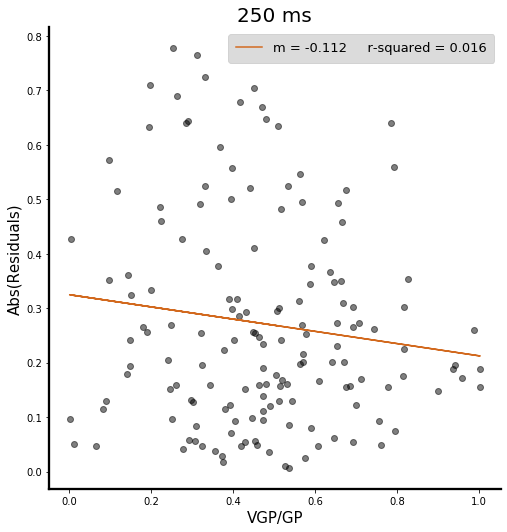

In [233]:

fig, ax = plt.subplots(figsize=[7,7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)

plt.tight_layout()    

    
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = np.abs(trunc_resid_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Abs(Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

#### Actual Depth

In [234]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgp_gp))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgp))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gp))

Correlation between Actual Depth and VGP/GP
(-0.08712410753715585, 0.2794809959214527)
Correlation between Actual Depth and VGP
(0.04754284307903837, 0.5556146971691864)
Correlation between Actual Depth and GP
(0.16743673736446738, 0.03668635251276759)


m: [-0.75970303]
b: 0.3808584731749296
R-squared:  0.07320992972701601


0.073

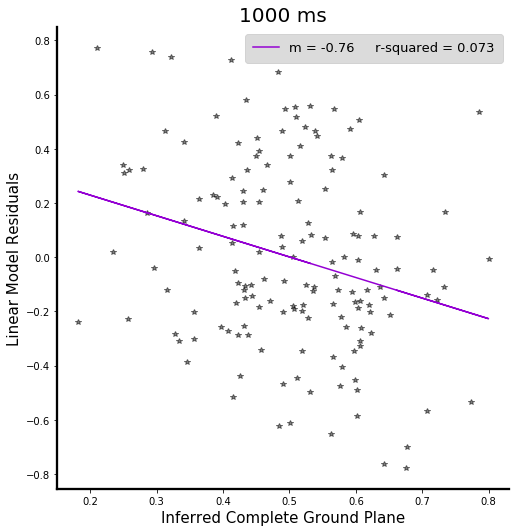

In [235]:
fig, ax = plt.subplots(figsize=[7,7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)

plt.tight_layout()    

#run regression
X = np.array(trunc_gp).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Inferred Complete Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.46923778]
b: 0.10782670839994218
R-squared:  0.024071731163162413


0.024

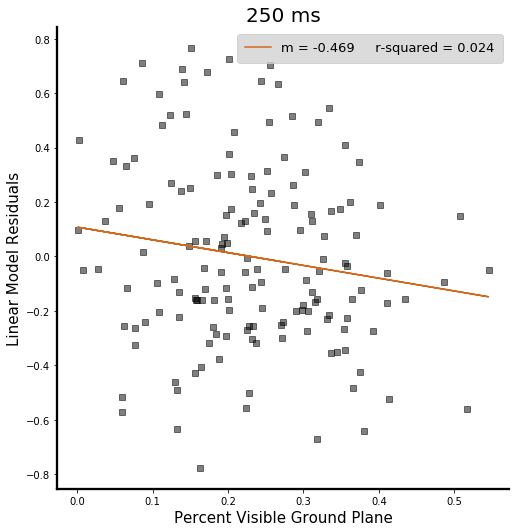

In [236]:
fig, ax = plt.subplots(figsize=[7,7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)

plt.tight_layout()    
#run regression
X = np.array(trunc_vgp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Percent Visible Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [237]:
# fig, ax = plt.subplots(figsize=[7,7])
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(2.3)

# plt.tight_layout()    
# #run regression
# X = np.array(trunc_vgp_gp).reshape(-1,1)
# y = trunc_resid_250
# reg = LinearRegression().fit(X, y)

# #Generated Predictions
# y_predicted = reg.predict(X)
# #Plot Our Actual and Predicted Values
# plt.plot(X, y, 'v', color='black', alpha = 0.5);
# plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("250 ms", fontsize = 20)
# plt.xlabel("VGP/GP", fontsize = 15)
# plt.ylabel("Linear Model Residuals", fontsize = 15)

# legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
# legend.get_frame().set_facecolor('lightgray')


# #get coefficients and y intercept
# print("m: {0}".format(reg.coef_))
# print("b: {0}".format(reg.intercept_))

# #Returns the coefficient of determination R^2 of the prediction.
# print("R-squared: ", reg.score(X, y))

# round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [238]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
# kinect192_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'
# stimuli_path = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli'

In [239]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [240]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [241]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gp))

Correlation between Global Mean Depth and Complete Ground Plane
(0.29999835041981887, 0.00014188365894478912)


m: [0.08390167]
b: 0.2844751501870868
R-squared:  0.08999901025461221


0.09

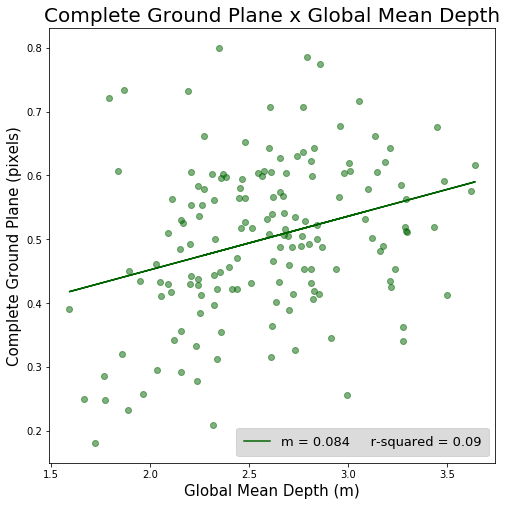

In [242]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gp
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Complete Ground Plane (pixels)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

### Navigation Clutter: Pixel Sum Method; GP - VGP

In [243]:
clutter_pixel = (np.array(trunc_gp) - np.array(trunc_vgp))

In [244]:
# corr, p-value
print('Correlation between Linear Model Residuals and Clutter (pixel sum)')
print('125 ms: ',stats.pearsonr(trunc_resid_125, clutter_pixel))
print('250 ms: ',stats.pearsonr(trunc_resid_250, clutter_pixel))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, clutter_pixel))

Correlation between Linear Model Residuals and Clutter (pixel sum)
125 ms:  (-0.13825230709000721, 0.08522209219107343)
250 ms:  (-0.10107378343874823, 0.20930603240271514)
1000 ms:  (-0.10499389295077707, 0.19208529796673582)


## Load Ground Plane Metrics: Pixel SA

In [245]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/VGP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/VGP_size_dict.json'
vgp_size_dict = json.load(open(path))


In [246]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'
gp_size_dict = json.load(open(path))

In [247]:
VGPS = []
GPS = []
for key in vgp_size_dict:
    try:
        gp = gp_size_dict[key]
        VGPS.append(vgp_size_dict[key])
        GPS.append(gp)
    except:
        pass

print(stats.pearsonr(VGPS, GPS))

(0.6305436407876517, 4.100796404472425e-18)


In [248]:
# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [249]:
# Find GP or VGP Outliers 

vgpsize_list = [[key, vgp_size_dict[key]] for key in vgp_size_dict]
vgpsize_mean = np.mean(np.array([elem[1] for elem in vgpsize_list]))
vgpsize_std = np.std(np.array([elem[1] for elem in vgpsize_list]))

vgpsize_outlierRange = [vgpsize_mean - (3*vgpsize_std), vgpsize_mean + (3*vgpsize_std)]

cleaned_vgpsize_dict = {}
for key in vgp_size_dict:
    if vgpsize_outlierRange[0] < vgp_size_dict[key] < vgpsize_outlierRange[1]:
        cleaned_vgpsize_dict[key] = vgp_size_dict[key]
    else:
        print(key, 'excluded')

002568_2014-06-24_13-59-21_094959634447_rgbf000062-resize excluded
002600_2014-06-24_14-27-04_094959634447_rgbf000074-resize excluded
002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002570_2014-06-24_13-59-54_094959634447_rgbf000059-resize excluded


In [250]:
ordered_gp_size = []
ordered_vgp_size = []

gp_none = 0
vgp_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)
    try:
        ordered_vgp_size.append(cleaned_vgpsize_dict[folder])
    except:
        vgp_none += 1
        ordered_vgp_size.append(None)

In [251]:
len(ordered_gp_size), gp_none

(156, 7)

In [252]:
len(ordered_vgp_size), vgp_none

(156, 9)

In [253]:
actual_depth_values = []
folders = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" + targetobj_num
#     p = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli/' + folder + '_' + targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
    folders.append(folder)
len(actual_depth_values)

156

In [254]:
# derivedVE_dict_125

In [255]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []

trunc_vgpSize_gpSize = []
trunc_vgpSize = []
trunc_gpSize = []
trunc_actual = []

trunc_std_125 = []
trunc_std_250 = []
trunc_std_1000 = []

for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float: 
        try:
            trunc_vgpSize_gpSize.append(ordered_vgp_size[i]/ordered_gp_size[i])
            trunc_vgpSize.append(ordered_vgp_size[i])
            trunc_gpSize.append(ordered_gp_size[i])

            trunc_resid_125.append(residuals_125[i])        
            trunc_resid_250.append(residuals_250[i])
            trunc_resid_1000.append(residuals_1000[i])

            trunc_actual.append(actual_depth_values[i])

            trunc_std_125.append(std_125[i])
            trunc_std_250.append(std_250[i])
            trunc_std_1000.append(std_1000[i])

        except: 
            pass



In [256]:
ddresid125_trunc_vgpSize = []
ddresid125_trunc_gpSize = []
ddresid125_trunc_actual = []

trunc_derivedVE_125 = []

trunc_residuals_derivedVE_125 = []

for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float: 
        if folders[i] in derivedVE_dict_125.keys():
            
            try:
                if ordered_vgp_size[i] != None:
                    
                    trunc_residuals_derivedVE_125.append(derivedVE_dict_125[folders[i]][1])


                    trunc_derivedVE_125.append(derivedVE_dict_125[folders[i]][0])

                    ddresid125_trunc_vgpSize.append(ordered_vgp_size[i])
                    ddresid125_trunc_gpSize.append(ordered_gp_size[i])

                    ddresid125_trunc_actual.append(actual_depth_values[i])


            except: 
                pass


In [257]:
len(trunc_residuals_derivedVE_125), len(ddresid125_trunc_vgpSize), len(trunc_derivedVE_125)

(144, 144, 144)

In [258]:
# trunc_residuals_derivedVE_125

In [259]:
ddresid250_trunc_vgpSize = []
ddresid250_trunc_gpSize = []
ddresid250_trunc_actual = []

trunc_residuals_derivedVE_250 = []

trunc_derivedVE_250 = []


for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float: 
        if folders[i] in derivedVE_dict_250.keys():
            
            try:
                if ordered_vgp_size[i] != None:
                    
                    trunc_residuals_derivedVE_250.append(derivedVE_dict_250[folders[i]][1])


                    trunc_derivedVE_250.append(derivedVE_dict_250[folders[i]][0])

                    ddresid250_trunc_vgpSize.append(ordered_vgp_size[i])
                    ddresid250_trunc_gpSize.append(ordered_gp_size[i])

                    ddresid250_trunc_actual.append(actual_depth_values[i])


            except: 
                pass


In [260]:
len(trunc_residuals_derivedVE_250), len(ddresid250_trunc_vgpSize), len(trunc_derivedVE_250)

(144, 144, 144)

In [261]:
ddresid1000_trunc_vgpSize = []
ddresid1000_trunc_gpSize = []
ddresid1000_trunc_actual = []

trunc_residuals_derivedVE_1000 = []

trunc_derivedVE_1000 = []

for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float: 
        if folders[i] in derivedVE_dict_1000.keys():
            
            try:
                if ordered_vgp_size[i] != None:
                    
                    trunc_residuals_derivedVE_1000.append(derivedVE_dict_1000[folders[i]][1])


                    trunc_derivedVE_1000.append(derivedVE_dict_1000[folders[i]][0])

                    ddresid1000_trunc_vgpSize.append(ordered_vgp_size[i])
                    ddresid1000_trunc_gpSize.append(ordered_gp_size[i])

                    ddresid1000_trunc_actual.append(actual_depth_values[i])


            except: 
                pass


In [262]:
len(trunc_residuals_derivedVE_1000), len(ddresid1000_trunc_vgpSize), len(trunc_derivedVE_1000)

(144, 144, 144)

In [263]:
# plt.plot(trunc_gpSize, trunc_vgpSize, 'o')

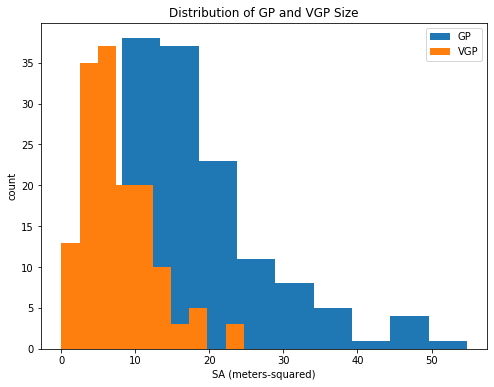

In [264]:
plt.figure(figsize=[8,6])
plt.title('Distribution of GP and VGP Size')
plt.hist(trunc_gpSize, label='GP')
plt.hist(trunc_vgpSize, label='VGP')

plt.ylabel('count')
plt.xlabel('SA (meters-squared)')

plt.legend()
plt.show();

In [265]:
# corr, p-value
# print('Correlation between Discrimination Derived VE and VGP/GP SA')
# print('125 ms: ',stats.pearsonr(trunc_derivedVE_125, ddtrunc_vgpSize_gpSize))
# print('250 ms: ',stats.pearsonr(trunc_derivedVE_250, ddtrunc_vgpSize_gpSize))
# print('1000 ms: ',stats.pearsonr(trunc_derivedVE_1000, ddtrunc_vgpSize_gpSize))



In [266]:
# corr, p-value
print('Correlation between Discrimination Derived VE and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_derivedVE_125, ddresid125_trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_derivedVE_250, ddresid250_trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_derivedVE_1000, ddresid1000_trunc_vgpSize))



Correlation between Discrimination Derived VE and VGP SA
125 ms:  (0.14854987140438985, 0.07557895685659838)
250 ms:  (0.25732008842547055, 0.001848626022712316)
1000 ms:  (0.019902057566154374, 0.8128377992692554)


In [267]:
# corr, p-value
print('Correlation between Discrimination Derived VE and GP SA')
print('125 ms: ',stats.pearsonr(trunc_derivedVE_125, ddresid125_trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_derivedVE_250, ddresid250_trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_derivedVE_1000, ddresid1000_trunc_gpSize))


Correlation between Discrimination Derived VE and GP SA
125 ms:  (0.12221835633350274, 0.14447850728649458)
250 ms:  (0.11366888069868845, 0.17492758066390413)
1000 ms:  (0.09596141292558243, 0.2525641616642558)


In [268]:
# corr, p-value
# print('Correlation between Discrimination Derived VE Linear Model Residuals and VGP/GP SA')
# print('125 ms: ',stats.pearsonr(trunc_residuals_derivedVE_125, ddtrunc_vgpSize_gpSize))
# print('250 ms: ',stats.pearsonr(trunc_residuals_derivedVE_250, ddtrunc_vgpSize_gpSize))
# print('1000 ms: ',stats.pearsonr(trunc_residuals_derivedVE_1000, ddtrunc_vgpSize_gpSize))



In [269]:
# corr, p-value
print('Correlation between Discrimination Derived VE Linear Model Residuals and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_residuals_derivedVE_125, ddresid125_trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_residuals_derivedVE_250, ddresid250_trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_residuals_derivedVE_1000, ddresid1000_trunc_vgpSize))



Correlation between Discrimination Derived VE Linear Model Residuals and VGP SA
125 ms:  (0.03707977833351704, 0.6590456700674888)
250 ms:  (0.1594652167571622, 0.05624400194618461)
1000 ms:  (-0.124375669019364, 0.13747133836340902)


In [270]:
# corr, p-value
print('Correlation between Discrimination Derived VE Linear Model Residuals and GP SA')
print('125 ms: ',stats.pearsonr(trunc_residuals_derivedVE_125, ddresid125_trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_residuals_derivedVE_250, ddresid250_trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_residuals_derivedVE_1000, ddresid1000_trunc_gpSize))



Correlation between Discrimination Derived VE Linear Model Residuals and GP SA
125 ms:  (-0.03113469715273165, 0.7110472409659078)
250 ms:  (-0.06038694925760897, 0.4721505754852709)
1000 ms:  (-0.12578655941502406, 0.13303082854053003)


In [271]:
stats.pearsonr(trunc_vgpSize, trunc_gpSize)

(0.6162035194788191, 1.2431826720725843e-16)

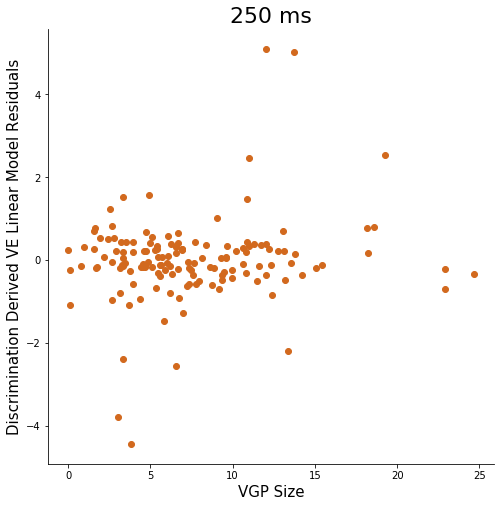

In [272]:

fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

plt.plot(ddresid250_trunc_vgpSize, trunc_residuals_derivedVE_250, 'o', color='chocolate')
plt.xlabel('VGP Size', fontsize=15)
plt.ylabel('Discrimination Derived VE Linear Model Residuals', fontsize=15)
plt.title('250 ms', fontsize=22)
plt.show();

### Absolute Value

In [273]:
# corr, p-value
print('Correlation between Abs Discrimination Derived VE Linear Model Residuals and VGP SA')
print('125 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_125), ddresid125_trunc_vgpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_250), ddresid250_trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_1000), ddresid1000_trunc_vgpSize))



Correlation between Abs Discrimination Derived VE Linear Model Residuals and VGP SA
125 ms:  (-0.14948268777673618, 0.07374055274822758)
250 ms:  (0.07475538139850275, 0.37320116781866686)
1000 ms:  (0.21603668664031414, 0.00930522712410247)


In [274]:
# corr, p-value
print('Correlation between Abs Discrimination Derived VE Linear Model Residuals and GP SA')
print('125 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_125), ddresid125_trunc_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_250), ddresid250_trunc_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_residuals_derivedVE_1000), ddresid1000_trunc_gpSize))



Correlation between Abs Discrimination Derived VE Linear Model Residuals and GP SA
125 ms:  (-0.09407062814211789, 0.2620758932378874)
250 ms:  (0.013449911057992656, 0.8728814632895391)
1000 ms:  (0.06486066058908779, 0.43990229056893304)


### Linear Model Residuals x GP Metrics

In [275]:
# corr, p-value
# print('Correlation between Linear Model Residuals and VGP/GP SA')
# print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize_gpSize))
# print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize_gpSize))
# print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize_gpSize))

In [276]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize))

Correlation between Linear Model Residuals and VGP SA
125 ms:  (-0.1303737502284452, 0.11677068057807287)
250 ms:  (-0.13686000789379565, 0.09951040072358441)
1000 ms:  (-0.20288550080391435, 0.014049242311141429)


In [277]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP SA')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gpSize))

Correlation between Linear Model Residuals and GP SA
125 ms:  (-0.1566089165545025, 0.059064555480622394)
250 ms:  (-0.1339740619723549, 0.10692347612342837)
1000 ms:  (-0.1963770805871622, 0.017519629396710854)


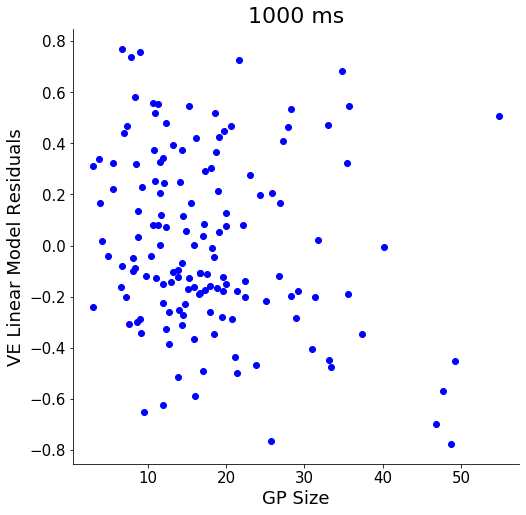

In [301]:

fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

plt.plot(trunc_gpSize, trunc_resid_1000, 'o', color='blue')
plt.xlabel('GP Size', fontsize=18)
plt.ylabel('VE Linear Model Residuals', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('1000 ms', fontsize=22)
plt.show();

### Combined duration residuals

In [298]:
# corr, p-value
print('Correlation between Average Linear Model Residuals and GP SA')
print(stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), trunc_gpSize))

print()

print('Correlation between All Linear Model Residuals and GP SA * 3')
print(stats.pearsonr(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, trunc_gpSize*3))

print()

print('Correlation between Average Linear Model Residuals and VGP SA')
print(stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), trunc_vgpSize))

print()

print('Correlation between All Linear Model Residuals and VGP SA * 3')
print(stats.pearsonr(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, trunc_vgpSize*3))

Correlation between Average Linear Model Residuals and GP SA
(-0.16621675920617754, 0.044951076137245694)

Correlation between All Linear Model Residuals and GP SA * 3
(-0.1626256708159981, 0.0006342054400194517)

Correlation between Average Linear Model Residuals and VGP SA
(-0.16032442056064403, 0.053226404922004276)

Correlation between All Linear Model Residuals and VGP SA * 3
(-0.15686063527156002, 0.0009881409148573754)


In [280]:
# corr, p-value
print('Correlation between Abs Average Linear Model Residuals and GP SA')
print(stats.pearsonr(np.abs(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0)), trunc_gpSize))

print()

print('Correlation between Abs All Linear Model Residuals and GP SA * 3')
print(stats.pearsonr(np.abs(np.array(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000)), trunc_gpSize*3))

print()

print('Correlation between Abs Average Linear Model Residuals and VGP SA')
print(stats.pearsonr(np.abs(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0)), trunc_vgpSize))

print()

print('Correlation between Abs All Linear Model Residuals and VGP SA * 3')
print(stats.pearsonr(np.abs(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000), trunc_vgpSize*3))

Correlation between Abs Average Linear Model Residuals and GP SA
(0.2563594975339796, 0.001788082061489578)

Correlation between Abs All Linear Model Residuals and GP SA * 3
(0.24357925498647953, 2.4549604226322116e-07)

Correlation between Abs Average Linear Model Residuals and VGP SA
(0.11635183286347392, 0.1619464607844682)

Correlation between Abs All Linear Model Residuals and VGP SA * 3
(0.11093274648826076, 0.020222847656754948)


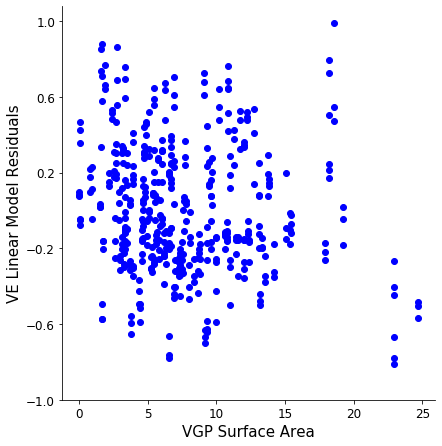

In [302]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(trunc_vgpSize*3, trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, 'o', color='blue')
plt.tight_layout()
plt.xlabel('VGP Surface Area', fontsize=15)
plt.ylabel('VE Linear Model Residuals', fontsize=15)
plt.yticks(np.arange(-1,1.2, 0.4),fontsize=12)
plt.xticks(fontsize=12)
plt.show();

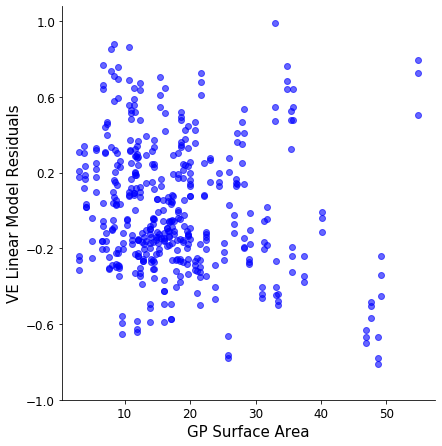

In [304]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot(trunc_gpSize*3, trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, 'o', color='blue', alpha=0.6)
plt.tight_layout()
plt.xlabel('GP Surface Area', fontsize=15)
plt.ylabel('VE Linear Model Residuals', fontsize=15)
plt.yticks(np.arange(-1,1.2, 0.4),fontsize=12)
plt.xticks(fontsize=12)
plt.show();

### Issue: The correlations are all against the a gpSize list that is constrained by the 125 ms outliers in the residuals 

Each duration has different ones excluded 

In [283]:
# corr, p-value
print('Correlation between Average Discrimination Derived Linear Model Residuals and GP SA')
print(stats.pearsonr(np.mean([trunc_residuals_derivedVE_125, trunc_residuals_derivedVE_250, trunc_residuals_derivedVE_1000], axis=0), ddresid125_trunc_gpSize))

print()

print('Correlation between All Discrimination Derived Linear Model Residuals and GP SA * 3')
print(stats.pearsonr(trunc_residuals_derivedVE_125 + trunc_residuals_derivedVE_250 + trunc_residuals_derivedVE_1000, ddresid125_trunc_gpSize*3))

print()

print('Correlation between Average Discrimination Derived Linear Model Residuals and VGP SA')
print(stats.pearsonr(np.mean([trunc_residuals_derivedVE_125, trunc_residuals_derivedVE_250, trunc_residuals_derivedVE_1000], axis=0), ddresid125_trunc_vgpSize))

print()

print('Correlation between All Discrimination Derived Linear Model Residuals and VGP SA * 3')
print(stats.pearsonr(trunc_residuals_derivedVE_125 + trunc_residuals_derivedVE_250 + trunc_residuals_derivedVE_1000, ddresid125_trunc_vgpSize*3))

Correlation between Average Discrimination Derived Linear Model Residuals and GP SA
(-0.07939470551294794, 0.34418570946852045)

Correlation between All Discrimination Derived Linear Model Residuals and GP SA * 3
(-0.057181012368192036, 0.23561751594081018)

Correlation between Average Discrimination Derived Linear Model Residuals and VGP SA
(0.09682198496628266, 0.24831479728431366)

Correlation between All Discrimination Derived Linear Model Residuals and VGP SA * 3
(0.06973234656014966, 0.1479187551227646)


In [284]:
# corr, p-value
print('Correlation between Abs Average Discrimination Derived Linear Model Residuals and GP SA')
print(stats.pearsonr(np.abs(np.mean([trunc_residuals_derivedVE_125, trunc_residuals_derivedVE_250, trunc_residuals_derivedVE_1000], axis=0)), ddresid125_trunc_gpSize))

print()

print('Correlation between Abs All Discrimination Derived Linear Model Residuals and GP SA * 3')
print(stats.pearsonr(np.abs(trunc_residuals_derivedVE_125 + trunc_residuals_derivedVE_250 + trunc_residuals_derivedVE_1000), ddresid125_trunc_gpSize*3))

print()

print('Correlation between Abs Average Discrimination Derived Linear Model Residuals and VGP SA')
print(stats.pearsonr(np.abs(np.mean([trunc_residuals_derivedVE_125, trunc_residuals_derivedVE_250, trunc_residuals_derivedVE_1000], axis=0)), ddresid125_trunc_vgpSize))

print()

print('Correlation between Abs All Discrimination Derived Linear Model Residuals and VGP SA * 3')
print(stats.pearsonr(np.abs(trunc_residuals_derivedVE_125 + trunc_residuals_derivedVE_250 + trunc_residuals_derivedVE_1000), ddresid125_trunc_vgpSize*3))


Correlation between Abs Average Discrimination Derived Linear Model Residuals and GP SA
(0.0002058734177092722, 0.9980460228449622)

Correlation between Abs All Discrimination Derived Linear Model Residuals and GP SA * 3
(-0.02494589786164953, 0.6051080213813688)

Correlation between Abs Average Discrimination Derived Linear Model Residuals and VGP SA
(-0.037660389888455534, 0.6540485499704107)

Correlation between Abs All Discrimination Derived Linear Model Residuals and VGP SA * 3
(-0.030194278520251017, 0.5313800814658219)


### STANDARD DEVIATION

In [285]:
# corr, p-value
print('Correlation between SD and VGP/GP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_vgpSize_gpSize))

Correlation between SD and VGP/GP SA
125 ms:  (-0.18996626027876268, 0.021641889405914633)
250 ms:  (-0.2299178902425394, 0.005242701065407059)
1000 ms:  (-0.14079843809789636, 0.09005539893247042)


In [286]:
# corr, p-value
print('Correlation between SD and VGP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_vgpSize))

Correlation between SD and VGP SA
125 ms:  (-0.004116882685445654, 0.9606665858778467)
250 ms:  (0.1232010909492751, 0.13847371669413716)
1000 ms:  (0.12278654636633778, 0.13981623594131254)


In [287]:
# corr, p-value
print('Correlation between SD and GP SA')
print('125 ms: ',stats.pearsonr(trunc_std_125, trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_std_250, trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_std_1000, trunc_gpSize))

Correlation between SD and GP SA
125 ms:  (0.14970360825423906, 0.07130900008302953)
250 ms:  (0.3317951039326756, 4.2925055042489975e-05)
1000 ms:  (0.2428504167935972, 0.003141966906696011)


#### Absolute value of residuals

In [288]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize_gpSize))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.12380522967964347, 0.13653481638955817)
250 ms:  (-0.12017084119025076, 0.14851688842939267)
1000 ms:  (-0.11917801716512857, 0.15192436386537228)


In [289]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (0.1365392166965244, 0.10031380329324069)
250 ms:  (0.08730189304228789, 0.29472724385855403)
1000 ms:  (0.10738989660408974, 0.19698887726952288)


In [290]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gpSize))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (0.23821178874919807, 0.0037869609461004348)
250 ms:  (0.24706482222353793, 0.0026437395871681856)
1000 ms:  (0.2465562507361697, 0.0026998132256046197)


m: [0.00493647]
b: 0.19206667767683305
R-squared:  0.05674485629909243


0.057

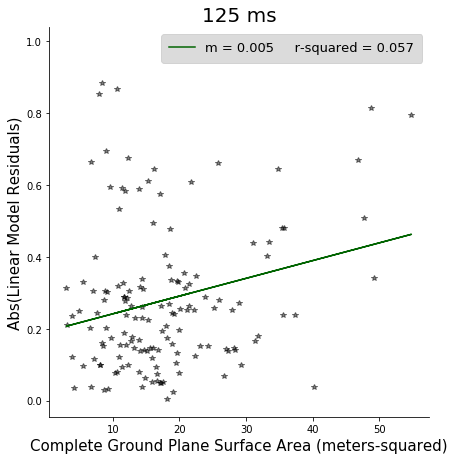

In [299]:
fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

#run regression
X = np.array(trunc_gpSize).reshape(-1,1)
y = np.abs(trunc_resid_125)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("125 ms", fontsize = 20)
plt.xlabel("Complete Ground Plane Surface Area (meters-squared)", fontsize = 15)
plt.ylabel("Abs(Linear Model Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [292]:
# plt.figure(figsize = [7,7])
# #run regression
# X = np.array(trunc_gpSize).reshape(-1,1)
# y = np.abs(trunc_resid_1000)
# reg = LinearRegression().fit(X, y)

# #Generated Predictions
# y_predicted = reg.predict(X)
# #Plot Our Actual and Predicted Values
# plt.plot(X, y, 'o', color='black', alpha = 0.5);
# plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
#          + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
# plt.title("1000 ms", fontsize = 20)
# plt.xlabel("Ground Plane Surface Area (meters-squared)", fontsize = 15)
# plt.ylabel("Linear Model Residuals", fontsize = 15)

# legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
# legend.get_frame().set_facecolor('lightgray')


# #get coefficients and y intercept
# print("m: {0}".format(reg.coef_))
# print("b: {0}".format(reg.intercept_))

# #Returns the coefficient of determination R^2 of the prediction.
# print("R-squared: ", reg.score(X, y))

# round(float(reg.score(X, y)), 3)

#### Actual Depth

In [293]:
# trunc_vgpSize == trunc_gpSize

In [294]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize_gpSize))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gpSize))

Correlation between Actual Depth and VGP/GP
(-0.08630803579661095, 0.30027947496074353)
Correlation between Actual Depth and VGP
(0.17889075672164295, 0.030739849680656246)
Correlation between Actual Depth and GP
(0.25972165140347453, 0.0015467718871468056)


m: [-0.00952549]
b: 0.07951832687146157
R-squared:  0.018730661760689937


0.019

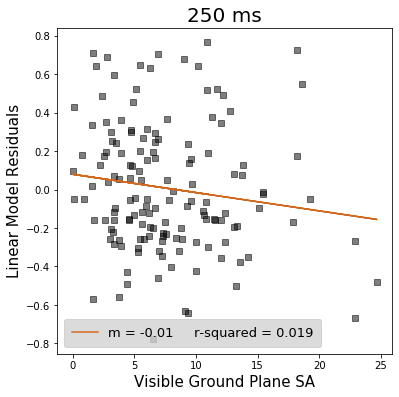

In [295]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Visible Ground Plane SA", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.00952549]
b: 0.07951832687146157
R-squared:  0.018730661760689937


0.019

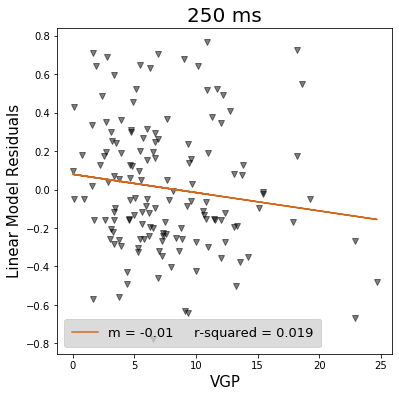

In [296]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [360]:
# kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

# stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [264]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [265]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_size)):
    if type(ordered_gp_size[i]) == float:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [266]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gpSize))

Correlation between Global Mean Depth and Complete Ground Plane


ValueError: x and y must have the same length.

m: [17.53990948]
b: -22.297939447106252
R-squared:  0.08533325037416128


0.085

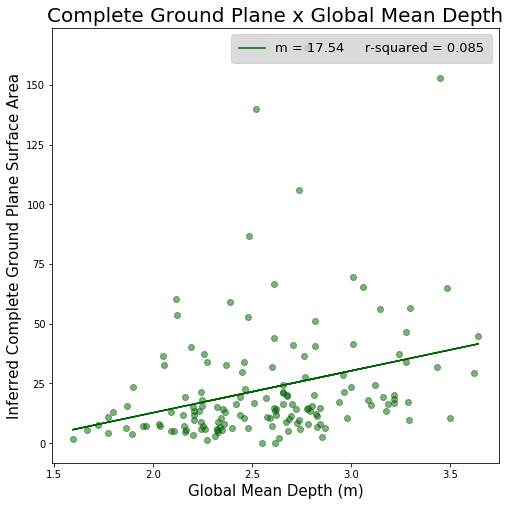

In [364]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gpSize
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Inferred Complete Ground Plane Surface Area", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## GP Defined Clutter 

In [305]:
clutter_size = (np.array(trunc_gpSize) - np.array(trunc_vgpSize)) 


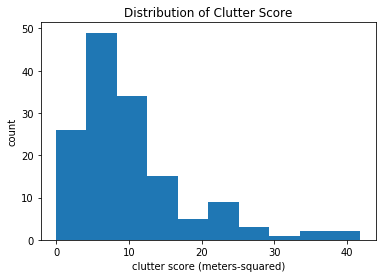

In [306]:
plt.title('Distribution of Clutter Score')
plt.hist(clutter_size)

plt.ylabel('count')
plt.xlabel('clutter score (meters-squared)')

plt.show();

In [311]:
len(clutter_size)

146

In [310]:
# corr, p-value
print('Correlation between Average Linear Model Residuals and GP Clutter')
print(stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), clutter_size))

print()

print('Correlation between All Linear Model Residuals and GP Clutter')
print(stats.pearsonr(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, clutter_size*3))

print()

print('Correlation between Average Linear Model Residuals and GP Clutter')
print(stats.pearsonr(np.mean([trunc_resid_125, trunc_resid_250, trunc_resid_1000], axis=0), clutter_size))

print()

print('Correlation between All Linear Model Residuals and GP Clutter')
print(stats.pearsonr(trunc_resid_125 + trunc_resid_250 + trunc_resid_1000, clutter_size*3))

Correlation between Average Linear Model Residuals and GP Clutter
(-0.1115398291520184, 0.1801339418991115)

Correlation between All Linear Model Residuals and GP Clutter


ValueError: x and y must have the same length.

In [307]:
# corr, p-value
print('Correlation between Linear Model Residuals and Clutter(size)')
print('125 ms: ',stats.pearsonr(trunc_resid_125, clutter_size))
print('250 ms: ',stats.pearsonr(trunc_resid_250, clutter_size))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, clutter_size))

Correlation between Linear Model Residuals and Clutter(size)
125 ms:  (-0.11753589746487046, 0.15768908520826339)
250 ms:  (-0.085309863770998, 0.30592481319921444)
1000 ms:  (-0.12367523919935568, 0.13695024255743518)


In [308]:
# corr, p-value
print('Correlation between Abs Linear Model Residuals and Clutter(size)')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), clutter_size))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), clutter_size))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), clutter_size))

Correlation between Abs Linear Model Residuals and Clutter(size)
125 ms:  (0.21593931577518033, 0.008851505483242187)
250 ms:  (0.2566392505778625, 0.0017667692507990981)
1000 ms:  (0.24391765332985527, 0.00300837250814679)


m: [-0.00537633]
b: 0.062235813501440744
R-squared:  0.015295564791017903


0.015

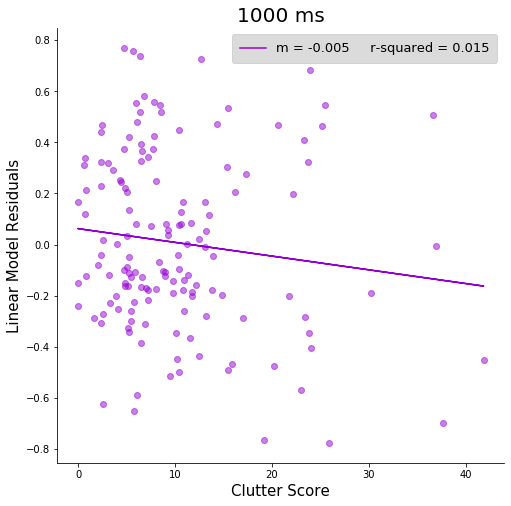

In [309]:

fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

#run regression
X = np.array(clutter_size).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkviolet', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Clutter Score", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

# Extrinsics

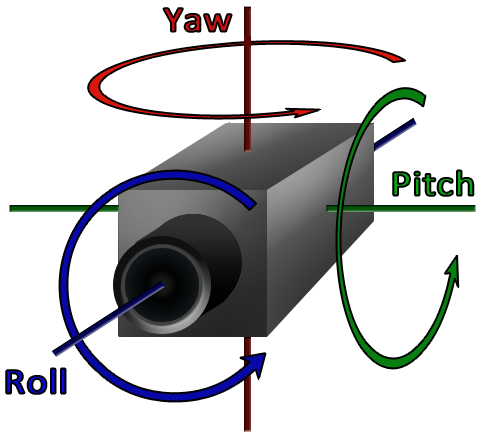

In [229]:
#converts the rotation matrix in extrinsics.txt from string to a numpy array 
def rotationmatrix(matrix_path):
    matrixtext = open(matrix_path).read()
    
    x00 = float(matrixtext.split('\t')[0].split(' ')[0])
    x01 = float(matrixtext.split('\n')[0].split(' ')[1])
    x02 = float(matrixtext.split('\n')[0].split(' ')[2])
    
    x10 = float(matrixtext.split('\n')[1].split(' ')[0])
    x11 = float(matrixtext.split('\n')[1].split(' ')[1])
    x12 = float(matrixtext.split('\n')[1].split(' ')[2])
    
    x20 = float(matrixtext.split('\n')[2].split(' ')[0])
    x21 = float(matrixtext.split('\n')[2].split(' ')[1])
    x22 = float(matrixtext.split('\n')[2].split(' ')[2])
    
    #list of the matrix values excluding the 3rd column of just zeroes 
    matrixlist = [[x00, x01, x02], [x10, x11, x12], [x20, x21, x22]]
    
    #creates 3x3 array of the rotation matrix
    matrixarray = np.full((3,3), matrixlist)
    
    return matrixarray

def rotationMatrixToEulerAngles(path):
    R = rotationmatrix(path)
    #assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])

# Output - final pitch, roll, yaw values in radians and degrees 
def imageExtrinsics(path):
    in_array = rotationMatrixToEulerAngles(path)
    #print ("Radian values : \n", in_array) 

    degree_Values = np.degrees(in_array) 
    
    return degree_Values[0], degree_Values[1], degree_Values[2]


def extrinsics_distribution(path, kinectv2):
    targetfolder = path.split('/')[1]
    if len(targetfolder) == 59:     
        imagefolder = path.split('/')[1][:-2]
    else:
        imagefolder = path.split('/')[1][:-3]

    extpath = kinectv2 + '/' + imagefolder + '/extrinsics' 
    fname = os.listdir(extpath)[0]
    if fname != '.ipynb_checkpoints':
        extrinsics = imageExtrinsics(extpath + '/' + fname)
    # pitch, roll, yaw
    return extrinsics[0], extrinsics[1], extrinsics[2]

In [230]:
kinectv2_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'
# kinectv2_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
# line comprehension for x(stim path) in final_x 

pitches = [extrinsics_distribution(path, kinectv2_path)[0] for path in stim_250]
rolls = [extrinsics_distribution(path, kinectv2_path)[1] for path in stim_250]
yaws = [extrinsics_distribution(path, kinectv2_path)[2] for path in stim_250]



In [231]:
trunc_pitches = []
trunc_rolls = []
trunc_yaws = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_pitches.append(pitches[i])
        trunc_rolls.append(rolls[i])
        trunc_yaws.append(yaws[i])

In [232]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gp, trunc_pitches))

Correlation between Complete Ground Plane and Pitch
(-0.24556062057426326, 0.00200267048192746)


In [233]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gp, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.10249815887246476, 0.20292515242437625)


In [234]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gp, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.06637340997880946, 0.4103688725357515)


m: [-0.00629131]
b: 0.3686413906910721
R-squared:  0.0603000183768172


0.06

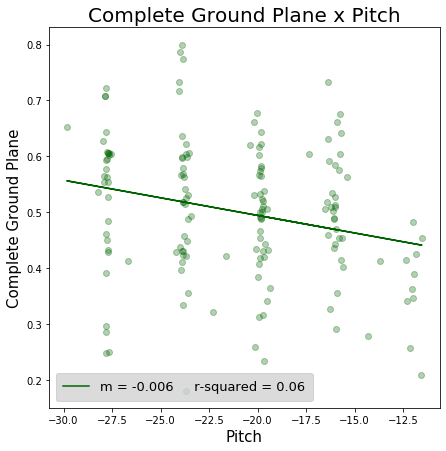

In [235]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

In [236]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gpSize, trunc_pitches))

Correlation between Complete Ground Plane and Pitch


ValueError: x and y must have the same length.

In [233]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gpSize, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.10249815887246476, 0.20292515242437625)


In [234]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gpSize, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.06637340997880946, 0.4103688725357515)


m: [-0.00629131]
b: 0.36864139069107216
R-squared:  0.0603000183768172


0.06

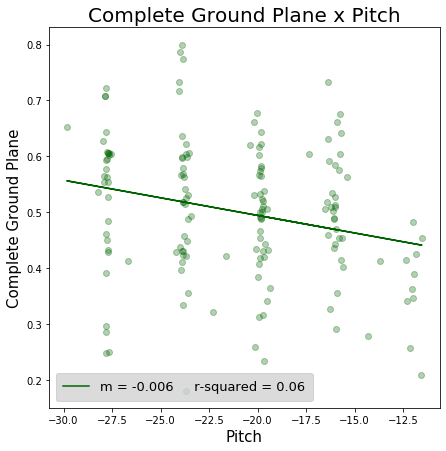

In [38]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)